## PRIYANSU PANDA

### LOADING THE DATA

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
data = pd.read_csv("Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### ANALYZING THE DATA

In [27]:
data.shape

(50, 5)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [29]:
data["State"].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data["State"] = enc.fit_transform(data["State"])

In [31]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [32]:
data.describe()

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,1.000000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.832993,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


<AxesSubplot:>

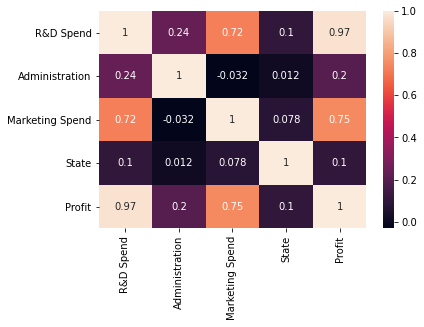

In [33]:
corr=data.corr()
sns.heatmap(corr,annot=True)

#### THE CORRELATION BETWEEN STATE AND PROFIT IS QUITE LOW.SO WE WON'T TAKE IT AS FEATURE.

### SELECTING FEATURE AND TARGET VALUE

In [34]:
x= data.iloc[:,0:3]
x.shape

(50, 3)

In [35]:
y=data.iloc[:,4]
y.shape

(50,)

### SPLITTING THE DATA INTO TRAINING AND TESTING SET

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=3)

### CREATING REGRESSION MODEL

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [41]:
model.fit(x_train,y_train)

LinearRegression()

### PREDICTION

In [42]:
y_pred=model.predict(x_test)

In [43]:
pd.DataFrame({"Actual Value":y_test,"Predicted Value":y_pred})

,Actual Value,Predicted Value
12,141585.52,128649.377664
39,81005.76,85309.283491
9,149759.96,155657.649789
47,42559.73,45362.778728
31,97483.56,96081.094803
28,103282.38,98234.676063
13,134307.35,126479.329105
48,35673.41,52899.886489
45,64926.08,47181.869642
6,156122.51,157820.334118


### EVALUATION

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("Mean Squared Error : ",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))

Mean Squared Error :  93171915.49920289
Root Mean Squared Error :  9652.560048981974
Mean Absolute Error :  7688.710533879761


In [44]:
print("Accuracy : ",model.score(x_test,y_test))

Accuracy :  0.946980087531592


####  THE ACCURACY OF OUR MODEL IS 94% WHICH IS QUITE HIGH.SO MULTIPLE REGRESSION IS VERY GOOD FOR THE GIVEN DATASET.